# Scenario 1: random fragmentation

In [2]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics.gofplots as gofplots
import time

In [3]:
# Record the starting time using the time module
start_time = time.time()

# Define minimum and maximum values for random data generation
min_value = 0.27 # Minimum value for random data
max_value = 8750 # Maximum value for random data



In [4]:
# Generate random data using numpy and create a DataFrame using pandas
# Generate 1000 random numbers uniformly distributed between min_value and max_value 
# complete_obj = pd.DataFrame(np.random.uniform(low=min_value, high=max_value, size=(1000,1)))

# The 'complete_obj' DataFrame contains 1000 rows and 1 column with random data points
# Optional Control Cell. To verify the logarithmic data distribution in 'complete_obj,' uncomment the cells.
# fig, axes = plt.subplots()
# sns.histplot(ax=axes,data= complete_obj, palette=['red'], log_scale=True, weights= None)
# plt.show()

In [5]:
# In this part of the script, random fragmentation of 'objects' in 'complete_obj' is simulated for a specified number of simulations ('num_simulations'). 
# For each element in 'complete_obj', a random number is subtracted iteratively for a set number of iterations ('n').


# Number of simulations and number of iterations
num_simulations = 100 # Number of simulations to perform
n = 6 # Number of iterations in each simulation

# Initialize an empty DataFrame to store fragmented data
fragm_obj = pd.DataFrame() 

# Perform simulations
for sim in range(num_simulations):
    # Generate initial complete_obj DataFrame with random uniform data
    complete_obj = pd.DataFrame(np.random.uniform(low=min_value, high=max_value, size=(1000, 1)))
    # Initialize a list to store fragmented data columns
    fragm_list = [complete_obj[0].tolist()]

    # Perform iterations to fragment the data
    for i in range(n):
        fragm_col = fragm_list[-1]

        new_fragm_col = []

        # Fragment the data and create new columns
        for j in range(len(fragm_col)):
            random_num = np.random.uniform(0, fragm_col[j])
            new_weight = max(fragm_col[j] - random_num, 0)
            new_fragm_col.extend([new_weight, random_num])

        fragm_list.append(new_fragm_col)

    fragm_list = fragm_list[1:]

    # Create column name for fragmented data
    fragm_col_name = f"Fragmented Weight {sim + 1}"
    # Add fragmented data column to fragm_obj DataFrame
    fragm_obj[fragm_col_name] = fragm_list[-1]  

    # Print simulation progress
    print(f"Simulation {sim+1}/{num_simulations} completed.")

# Print the resulting fragmented data DataFrame    
#print(fragm_obj)



Simulation 1/100 completed.
Simulation 2/100 completed.
Simulation 3/100 completed.
Simulation 4/100 completed.
Simulation 5/100 completed.
Simulation 6/100 completed.
Simulation 7/100 completed.
Simulation 8/100 completed.
Simulation 9/100 completed.
Simulation 10/100 completed.
Simulation 11/100 completed.
Simulation 12/100 completed.
Simulation 13/100 completed.
Simulation 14/100 completed.
Simulation 15/100 completed.
Simulation 16/100 completed.
Simulation 17/100 completed.
Simulation 18/100 completed.
Simulation 19/100 completed.
Simulation 20/100 completed.
Simulation 21/100 completed.
Simulation 22/100 completed.
Simulation 23/100 completed.
Simulation 24/100 completed.
Simulation 25/100 completed.
Simulation 26/100 completed.
Simulation 27/100 completed.
Simulation 28/100 completed.
Simulation 29/100 completed.
Simulation 30/100 completed.
Simulation 31/100 completed.
Simulation 32/100 completed.
Simulation 33/100 completed.
Simulation 34/100 completed.
Simulation 35/100 compl

In [6]:
# Read data from the Excel file 'DB_SI.xlsx' and store it in the DataFrame 'Arch_data'.
Arch_data = pd.read_excel('DB_SI.xlsx')

In [16]:
# This section of code filters fragmented object weights from the three archaeological phases used in our analysis.
# The weights are then sorted in ascending order, and their logarithms are computed.
# The final result is a numerical series for each phase with fragment weights on a logarithmic scale.

# Filter data for Phase 1 where objects are fragmented and have positive weights.
phase1_real = Arch_data.loc[(Arch_data['Phase'] == 1) & 
                            (Arch_data['complete/fragmented/undetermined'] == 'fragment') &
                            (Arch_data['Weight_obj'] > 0)].copy()

# Sort Phase 1 data by 'Weight_obj' in ascending order and reset the index.
phase1_real_sorted = phase1_real.sort_values(by='Weight_obj')
phase1_real_sorted = phase1_real_sorted.reset_index(drop=True)

# Compute logarithm of the sorted Phase 1 weights and store in 'phase1_log'.
phase1_log = np.log(phase1_real_sorted['Weight_obj'])

# Similar operations for Phase 2 and Phase 3 data.
phase2_real = Arch_data.loc[(Arch_data['Phase'] == 2) & 
                            (Arch_data['complete/fragmented/undetermined'] == 'fragment') &
                            (Arch_data['Weight_obj'] > 0)].copy()
phase2_real_sorted = phase2_real.sort_values(by='Weight_obj')
phase2_real_sorted = phase2_real_sorted.reset_index(drop=True)
phase2_log = np.log(phase2_real_sorted['Weight_obj'])

phase3_real = Arch_data.loc[(Arch_data['Phase'] == 3) & 
                            (Arch_data['complete/fragmented/undetermined'] == 'fragment') &
                            (Arch_data['Weight_obj'] > 0)].copy()
phase3_real_sorted = phase3_real.sort_values(by='Weight_obj')
phase3_real_sorted = phase3_real_sorted.reset_index(drop=True)
phase3_log = np.log(phase3_real_sorted['Weight_obj'])

In [9]:
# Calculate the mean of the logarithms of weights per Phase
mean_real1 = phase1_log.mean()
mean_real2 = phase2_log.mean()
mean_real3 = phase3_log.mean()

# Calculate the standard deviation of the logarithms of weights per Phase
std_real1 = phase1_log.std()
std_real2 = phase2_log.std()
std_real3 = phase3_log.std()

# Standardize the logarithms of weights per Phase using the calculated mean and standard deviation
phase1_standardized = (phase1_log - mean_real1) / std_real1
phase2_standardized = (phase2_log - mean_real2) / std_real2
phase3_standardized = (phase3_log - mean_real3) / std_real3

Running time: 96.195396900177 seconds


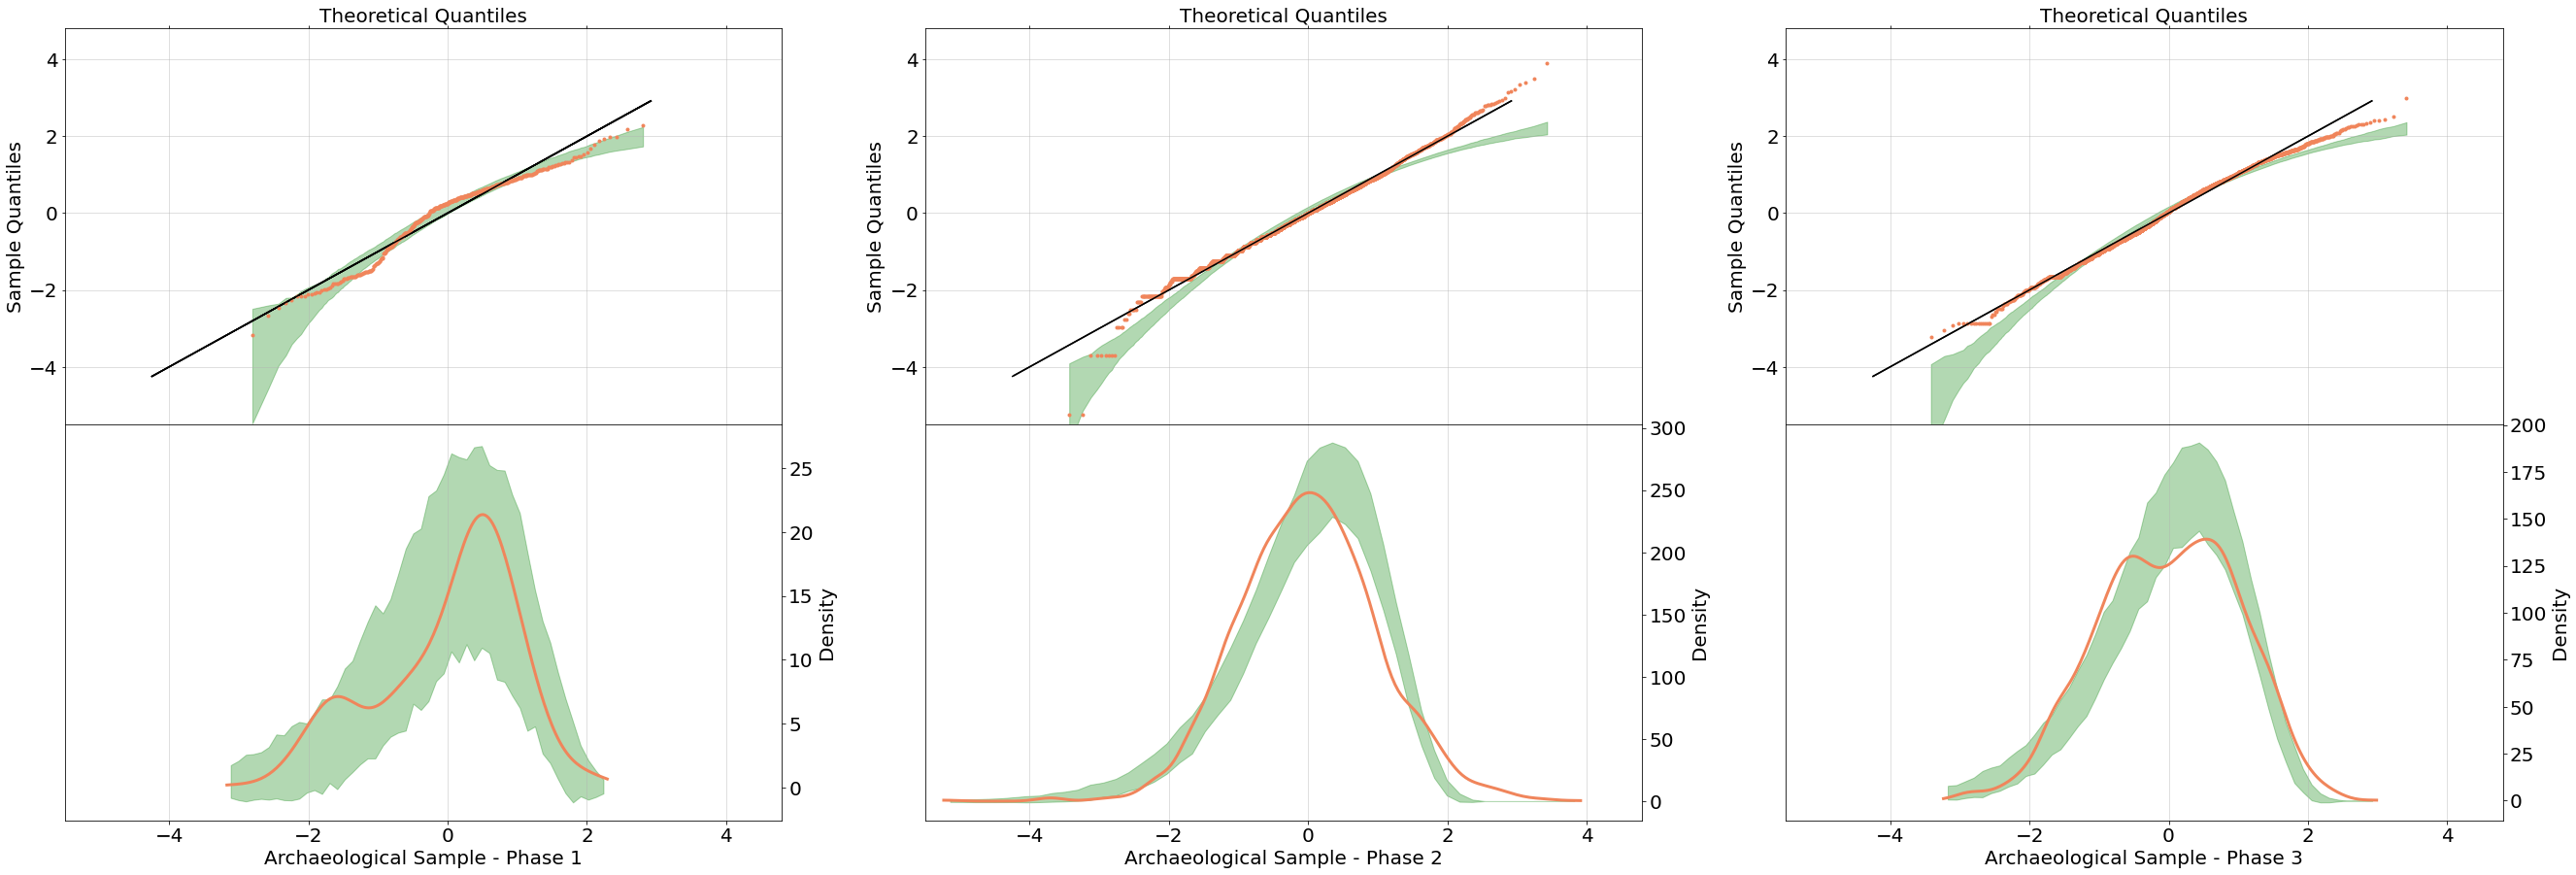

In [10]:
# Create a 2x3 grid of subplots with shared x-axis and a specified figure size
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(45,15))

# Define bin range and number of bins for histogram plots
bin_range = (np.log(0.1), np.log(100))
num_bin = 50

# Apply logarithm transformation to fragm_obj DataFrame
fragm_obj_log = np.log(fragm_obj)

# Generate logarithmically spaced bins for histograms
bins = np.logspace(*bin_range, num=num_bin)
random_sampling_list_ph1 = []
random_sampling_list_ph2 = []
random_sampling_list_ph3 = []


# Define the number of random samplings based on the length of the respective phases
ph_count_ph1 = len(phase1_log)
ph_count_ph2 = len(phase2_log)
ph_count_ph3 = len(phase3_log)
for_range_qq = 100

# Reshape the DataFrame for easier manipulation and standardization
united_fragm_obj = fragm_obj_log.stack().reset_index(drop=True).to_frame()
mean_united_fragm_obj = united_fragm_obj.mean()
sd_united_fragm_obj = united_fragm_obj.std()
united_standardized_fragm_obj = (united_fragm_obj - mean_united_fragm_obj) / sd_united_fragm_obj


qqplot_values_ph1 = []
qqplot_values_ph2 = []
qqplot_values_ph3 = []

# Generate random samples and calculate QQ plot values per Phase
for i in range(for_range_qq):
    prova_ph1=united_standardized_fragm_obj.sample(ph_count_ph1)
    prova_sorted_ph1 = prova_ph1.sort_values(by=0).reset_index(drop=True)
    #qqplot_s = gofplots.qqplot(prova_sorted_ph1, line='45', ax=axes[0], alpha=0.0)
    qqplot_values_ph1.append(prova_sorted_ph1)
    
for i in range(for_range_qq):
    prova_ph2=united_standardized_fragm_obj.sample(ph_count_ph2)
    prova_sorted_ph2 = prova_ph2.sort_values(by=0).reset_index(drop=True)
    #qqplot_s = gofplots.qqplot(prova_sorted_ph2, line='45', ax=axes[0], alpha=0.0)
    qqplot_values_ph2.append(prova_sorted_ph2)
    
for i in range(for_range_qq):
    prova_ph3=united_standardized_fragm_obj.sample(ph_count_ph3)
    prova_sorted_ph3 = prova_ph3.sort_values(by=0).reset_index(drop=True)
    #qqplot_s = gofplots.qqplot(prova_sorted_ph3, line='45', ax=axes[0], alpha=0.0)
    qqplot_values_ph3.append(prova_sorted_ph3)

# Calculate mean and standard deviation of the QQ plot values for each phase
mean_qqplot_values_ph1 = np.mean(qqplot_values_ph1, axis=0)
mean_qqplot_values_ph2 = np.mean(qqplot_values_ph2, axis=0)
mean_qqplot_values_ph3 = np.mean(qqplot_values_ph3, axis=0)
sd_qqvalues_ph1 = np.std(qqplot_values_ph1, axis=0)
sd_qqvalues_ph2 = np.std(qqplot_values_ph2, axis=0)
sd_qqvalues_ph3 = np.std(qqplot_values_ph3, axis=0)
sd2_qqvalues_ph1 = 2*sd_qqvalues_ph1
sd2_qqvalues_ph2 = 2*sd_qqvalues_ph2
sd2_qqvalues_ph3 = 2*sd_qqvalues_ph3
lower_limit_qq_ph1 = mean_qqplot_values_ph1 - sd2_qqvalues_ph1
lower_limit_qq_ph2 = mean_qqplot_values_ph2 - sd2_qqvalues_ph2
lower_limit_qq_ph3 = mean_qqplot_values_ph3 - sd2_qqvalues_ph3
upper_limit_qq_ph1 = mean_qqplot_values_ph1 + sd2_qqvalues_ph1
upper_limit_qq_ph2 = mean_qqplot_values_ph2 + sd2_qqvalues_ph2
upper_limit_qq_ph3 = mean_qqplot_values_ph3 + sd2_qqvalues_ph3

# Plot QQ plots with upper and lower confidence intervals for each phase
qqplot_ul_ph1 = sm.qqplot(upper_limit_qq_ph1, line='45', ax=axes[0, 0])
line_ul_ph1 = axes[0, 0].get_lines()[-1]
line_ul_ph1.set_color('black')
dots_ul_ph1 = axes[0, 0].get_lines()[0]
dots_ul_ph1.set_alpha(0)
line_ul_xdata_ph1 = dots_ul_ph1.get_xdata()
line_ul_ydata_ph1 = dots_ul_ph1.get_ydata()

qqplot_ul_ph2 = sm.qqplot(upper_limit_qq_ph2, line='45', ax=axes[0, 1])
line_ul_ph2 = axes[0, 1].get_lines()[-1]
line_ul_ph2.set_color('black')
dots_ul_ph2 = axes[0, 1].get_lines()[0]
dots_ul_ph2.set_alpha(0)
line_ul_xdata_ph2 = dots_ul_ph2.get_xdata()
line_ul_ydata_ph2 = dots_ul_ph2.get_ydata()

qqplot_ul_ph3 = sm.qqplot(upper_limit_qq_ph3, line='45', ax=axes[0, 2])
line_ul_ph3 = axes[0, 2].get_lines()[-1]
line_ul_ph3.set_color('black')
dots_ul_ph3 = axes[0, 2].get_lines()[0]
dots_ul_ph3.set_alpha(0)
line_ul_xdata_ph3 = dots_ul_ph3.get_xdata()
line_ul_ydata_ph3 = dots_ul_ph3.get_ydata()

# Plot QQ plots with upper and lower confidence intervals for each phase
qqplot_ll_ph1 = sm.qqplot(lower_limit_qq_ph1, line='45', ax=axes[0, 0])
line_ll_ph1 = axes[0, 0].get_lines()[-1]
line_ll_ph1.set_color('black')
dots_ll_ph1 = axes[0, 0].get_lines()[-2]
dots_ll_ph1.set_alpha(0)
line_ll_xdata_ph1 = dots_ll_ph1.get_xdata()
line_ll_ydata_ph1 = dots_ll_ph1.get_ydata()

qqplot_ll_ph2 = sm.qqplot(lower_limit_qq_ph2, line='45', ax=axes[0, 0])
line_ll_ph2 = axes[0, 0].get_lines()[-1]
line_ll_ph2.set_color('black')
dots_ll_ph2 = axes[0, 0].get_lines()[-2]
dots_ll_ph2.set_alpha(0)
line_ll_xdata_ph2 = dots_ll_ph2.get_xdata()
line_ll_ydata_ph2 = dots_ll_ph2.get_ydata()

qqplot_ll_ph3 = sm.qqplot(lower_limit_qq_ph3, line='45', ax=axes[0, 0])
line_ll_ph3 = axes[0, 0].get_lines()[-1]
line_ll_ph3.set_color('black')
dots_ll_ph3 = axes[0, 0].get_lines()[-2]
dots_ll_ph3.set_alpha(0)
line_ll_xdata_ph3 = dots_ll_ph3.get_xdata()
line_ll_ydata_ph3 = dots_ll_ph3.get_ydata()

# QQ plots for standardized data of each Archaeological phase
qqplot_arch_ph1 = sm.qqplot(phase1_standardized, line='45', ax=axes[0, 0], 
                        marker='o', markerfacecolor='#F0855B', markeredgecolor='none', markersize=4)
line_arch_ph1 = axes[0, 0].get_lines()[-1]
line_arch_ph1.set_color('black')

qqplot_arch_ph2 = sm.qqplot(phase2_standardized, line='45', ax=axes[0, 1], 
                        marker='o', markerfacecolor='#F0855B', markeredgecolor='none', markersize=4)
line_arch_ph2 = axes[0, 1].get_lines()[-1]
line_arch_ph2.set_color('black')

qqplot_arch_ph3 = sm.qqplot(phase3_standardized, line='45', ax=axes[0, 2], 
                        marker='o', markerfacecolor='#F0855B', markeredgecolor='none', markersize=4)
line_arch_ph3 = axes[0, 2].get_lines()[-1]
line_arch_ph3.set_color('black')

axes[0, 0].fill_between(line_ul_xdata_ph1, line_ul_ydata_ph1, line_ll_ydata_ph1, color='green', alpha=0.3)
axes[0, 1].fill_between(line_ul_xdata_ph2, line_ul_ydata_ph2, line_ll_ydata_ph2, color='green', alpha=0.3)
axes[0, 2].fill_between(line_ul_xdata_ph3, line_ul_ydata_ph3, line_ll_ydata_ph3, color='green', alpha=0.3)

# Create histograms for each Archaeological phase and plot them
sns.histplot(ax=axes[1, 0], data=phase1_standardized, legend=False, 
             element='step', kde=True, line_kws={'lw': 3, 'ls': '-'}, 
             bins= num_bin, fill=False, alpha=0, color='#F0855B', label='archaeological fragments Ph1')
values_bin_ph1, bins_real_ph1 = np.histogram(phase1_standardized, bins=num_bin)

sns.histplot(ax=axes[1, 1], data=phase2_standardized, legend=False, 
             element='step', kde=True, line_kws={'lw': 3, 'ls': '-'}, 
             bins= num_bin, fill=False, alpha=0, color='#F0855B', label='archaeological fragments Ph2')
values_bin_ph2, bins_real_ph2 = np.histogram(phase2_standardized, bins=num_bin)

sns.histplot(ax=axes[1, 2], data=phase3_standardized, legend=False, 
             element='step', kde=True, line_kws={'lw': 3, 'ls': '-'}, 
             bins= num_bin, fill=False, alpha=0, color='#F0855B', label='archaeological fragments Ph3')
values_bin_ph3, bins_real_ph3 = np.histogram(phase3_standardized, bins=num_bin)

# Bootstrap sampling for creating confidence intervals for histograms
for i in range(100):
    random_sampling_ph1 = united_standardized_fragm_obj.sample(ph_count_ph1)
    values_random_sampling_ph1, bins_ph1 = np.histogram(random_sampling_ph1, bins=bins_real_ph1)
    random_sampling_list_ph1.append(values_random_sampling_ph1)
    
for i in range(100):
    random_sampling_ph2 = united_standardized_fragm_obj.sample(ph_count_ph2)
    values_random_sampling_ph2, bins_ph2 = np.histogram(random_sampling_ph2, bins=bins_real_ph2)
    random_sampling_list_ph2.append(values_random_sampling_ph2)
    
for i in range(100):
    random_sampling_ph3 = united_standardized_fragm_obj.sample(ph_count_ph3)
    values_random_sampling_ph3, bins_ph3 = np.histogram(random_sampling_ph3, bins=bins_real_ph3)
    random_sampling_list_ph3.append(values_random_sampling_ph3)
    
# Calculate mean and standard deviation for bootstrap samples
mean_standardized_bin_ph1 = np.mean(random_sampling_list_ph1, axis=0)
mean_standardized_bin_ph2 = np.mean(random_sampling_list_ph2, axis=0)
mean_standardized_bin_ph3 = np.mean(random_sampling_list_ph3, axis=0)

# Calculate midpoints of bins for each phase
bin_mid_standardized_ph1 = np.mean(np.vstack([bins_real_ph1, np.roll(bins_real_ph1, -1)]), axis=0)[:-1]
bin_mid_standardized_ph2 = np.mean(np.vstack([bins_real_ph2, np.roll(bins_real_ph2, -1)]), axis=0)[:-1]
bin_mid_standardized_ph3 = np.mean(np.vstack([bins_real_ph3, np.roll(bins_real_ph3, -1)]), axis=0)[:-1]

# Calculate standard deviation for bootstrap samples
sd_values_standardized_ph1 = np.std(random_sampling_list_ph1, axis=0)
sd_values_standardized_ph2 = np.std(random_sampling_list_ph2, axis=0)
sd_values_standardized_ph3 = np.std(random_sampling_list_ph3, axis=0)

# Calculate 2-sigma standard deviation for confidence intervals
std_2sigma_standardized_ph1 = 2*sd_values_standardized_ph1
std_2sigma_standardized_ph2 = 2*sd_values_standardized_ph2
std_2sigma_standardized_ph3 = 2*sd_values_standardized_ph3

# Calculate lower and upper limits for confidence intervals
lower_limit_ph1 = mean_standardized_bin_ph1 - std_2sigma_standardized_ph1
lower_limit_ph2 = mean_standardized_bin_ph2 - std_2sigma_standardized_ph2
lower_limit_ph3 = mean_standardized_bin_ph3 - std_2sigma_standardized_ph3
upper_limit_ph1 = mean_standardized_bin_ph1 + std_2sigma_standardized_ph1
upper_limit_ph2 = mean_standardized_bin_ph2 + std_2sigma_standardized_ph2
upper_limit_ph3 = mean_standardized_bin_ph3 + std_2sigma_standardized_ph3

# Fill confidence interval area with green color for each phase
axes[1, 0].fill_between(bin_mid_standardized_ph1, lower_limit_ph1, upper_limit_ph1, color='green', alpha=0.3)
axes[1, 1].fill_between(bin_mid_standardized_ph2, lower_limit_ph2, upper_limit_ph2, color='green', alpha=0.3)
axes[1, 2].fill_between(bin_mid_standardized_ph3, lower_limit_ph3, upper_limit_ph3, color='green', alpha=0.3)

axes[1, 0].grid(axis='x', alpha=0.5)
axes[1, 1].grid(axis='x', alpha=0.5)
axes[1, 2].grid(axis='x', alpha=0.5)
axes[0, 0].grid(True, alpha=0.5)
axes[0, 1].grid(True, alpha=0.5)
axes[0, 2].grid(True, alpha=0.5)
axes[0, 0].spines['bottom'].set_linewidth(0)
axes[0, 1].spines['bottom'].set_linewidth(0)
axes[0, 2].spines['bottom'].set_linewidth(0)
axes[0, 0].xaxis.set_ticks_position('top')
axes[0, 1].xaxis.set_ticks_position('top')
axes[0, 2].xaxis.set_ticks_position('top')
axes[0, 0].xaxis.set_label_position('top')
axes[0, 1].xaxis.set_label_position('top')
axes[0, 2].xaxis.set_label_position('top')
plt.setp(axes[0, 0].get_xticklabels(), visible=False)
plt.setp(axes[0, 1].get_xticklabels(), visible=False)
plt.setp(axes[0, 2].get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=0)
axes[0, 0].set_ylim(-5.5, 4.8)
axes[0, 1].set_ylim(-5.5, 4.8)
axes[0, 2].set_ylim(-5.5, 4.8)
axes[1, 0].yaxis.tick_right() 
axes[1, 0].yaxis.set_label_position('right')
axes[1, 0].set_ylabel('Count',fontsize = 20.0)
axes[1, 1].yaxis.tick_right() 
axes[1, 1].yaxis.set_label_position('right')
axes[1, 1].set_ylabel('Count',fontsize = 20)
axes[1, 2].yaxis.tick_right() 
axes[1, 2].yaxis.set_label_position('right')
axes[1, 2].set_ylabel('Count',fontsize = 20)
axes[1, 2].tick_params(axis='y', labelright=True, labelleft=False)
axes[1, 0].set_xlim(-5.5, 4.8)
axes[1, 1].set_xlim(-5.5, 4.8)
axes[1, 2].set_xlim(-5.5, 4.8)
axes[1, 0].tick_params(axis='x', labelsize=20)
axes[1, 1].tick_params(axis='x', labelsize=20)
axes[1, 2].tick_params(axis='x', labelsize=20)
axes[1, 0].set_ylabel('Density',fontsize = 20)
axes[1, 1].set_ylabel('Density',fontsize = 20)
axes[1, 2].set_ylabel('Density',fontsize = 20)
axes[1, 0].tick_params(axis='y', labelsize=20)
axes[1, 1].tick_params(axis='y', labelsize=20)
axes[1, 2].tick_params(axis='y', labelsize=20)
axes[0, 0].tick_params(axis='y', labelsize=20)
axes[0, 1].tick_params(axis='y', labelsize=20)
axes[0, 2].tick_params(axis='y', labelsize=20)
axes[0, 0].set_ylabel('Sample Quantiles',fontsize = 20)
axes[0, 0].set_xlabel('Theoretical Quantiles',fontsize = 20)
axes[0, 1].set_ylabel('Sample Quantiles',fontsize = 20)
axes[0, 1].set_xlabel('Theoretical Quantiles',fontsize = 20)
axes[0, 2].set_ylabel('Sample Quantiles',fontsize = 20)
axes[0, 2].set_xlabel('Theoretical Quantiles',fontsize = 20)
axes[1, 0].set_xlabel('Archaeological Sample - Phase 1',fontsize = 20)
axes[1, 1].set_xlabel('Archaeological Sample - Phase 2',fontsize = 20) 
axes[1, 2].set_xlabel('Archaeological Sample - Phase 3',fontsize = 20) 


# Save the figure to a file (optional)

# Calculate and print the running time of the script
#plt.savefig('Scenario_1.pdf', format='pdf')
end_time = time.time()
total_time = end_time - start_time
print(f"Running time: {total_time} seconds")
plt.show()